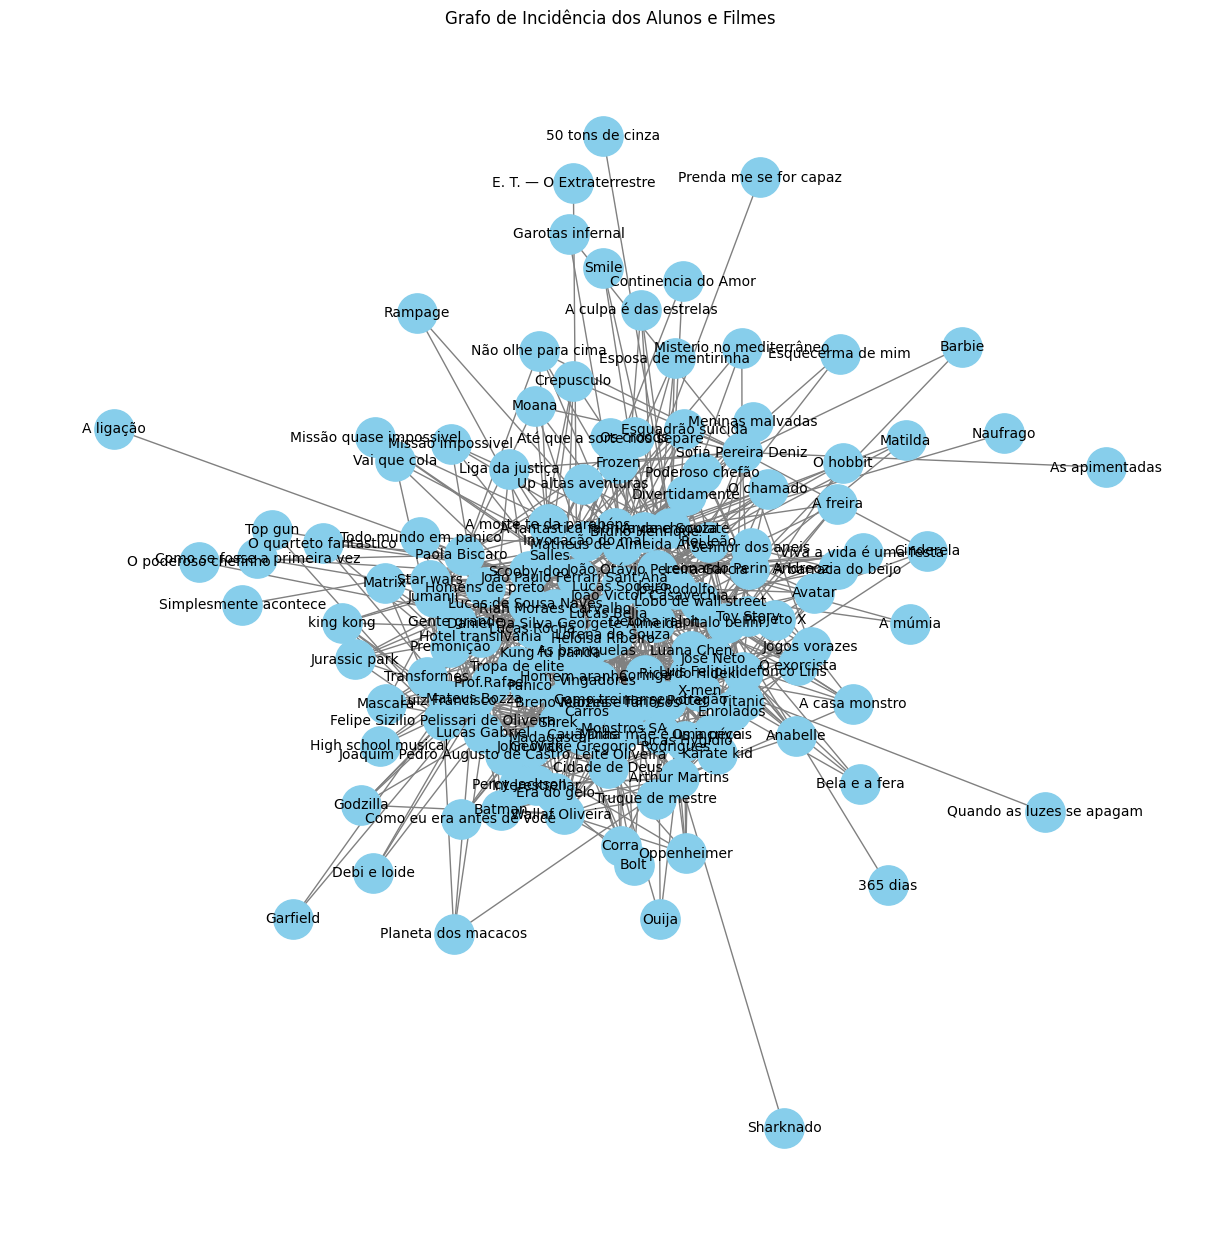

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Caminho do arquivo Excel
caminho_arquivo_excel = r"Dados_grafosXLSX.xlsx"

# Carregar dados do Excel
dataframe = pd.read_excel(caminho_arquivo_excel, engine='openpyxl')

# Nome correto da coluna que contém os nomes dos alunos
coluna_alunos = 'Nome e sobrenome'

# Separar filmes
filmes_separados = dataframe['Filmes'].str.split(',', expand=True)

# Normalizar nomes dos filmes (remover espaços extras)
for col in filmes_separados.columns:
    filmes_separados[col] = filmes_separados[col].str.strip()

# Criar lista de todos os filmes únicos
todos_filmes = np.unique(filmes_separados.values[~pd.isna(filmes_separados.values)])

# Criar DataFrame para matriz de incidência
matriz_incidencia = pd.DataFrame(0, index=dataframe[coluna_alunos], columns=todos_filmes)

# Preencher matriz de incidência
for i, aluno in enumerate(dataframe[coluna_alunos]):
    filmes = filmes_separados.iloc[i].dropna().tolist()
    for filme in filmes:
        matriz_incidencia.at[aluno, filme] = 1

# Criar grafo de rede usando NetworkX
G = nx.Graph()

# Adicionar nós (alunos) ao grafo
for aluno in matriz_incidencia.index:
    G.add_node(aluno)

# Adicionar arestas (conexões entre alunos e filmes) ao grafo
for filme in todos_filmes:
    alunos_que_escolheram_filme = matriz_incidencia[matriz_incidencia[filme] == 1].index.tolist()
    for aluno1 in alunos_que_escolheram_filme:
        G.add_edge(aluno1, filme)

# Posicionamento dos nós (alunos) no grafo
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Desenhar grafo de rede
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=800, with_labels=True, font_size=10, node_color='skyblue', edge_color='gray')

plt.title('Grafo de Incidência dos Alunos e Filmes')
plt.show()